In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 1) Suno Research

In [3]:
with open('../crawlers/suno/data/suno-latest-results-20230725.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_suno = pd.DataFrame(data)

In [4]:
# Convert date to datetime format
df_suno['date'] = pd.to_datetime(df_suno['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df_suno.set_index('date', inplace=True)

# Order by date
df_suno.sort_index(inplace=True)

In [7]:
df_suno.tail()

,topic,title,full_text,url,tags
date,,,,,
2023-07-25 11:56:00,Negócios,"Via (VIIA3), Magazine Luiza (MGLU3) e mais var...",As ações de Via (VIIA3) e Magazine Luiza (MGLU...,https://www.suno.com.br/noticias/via-viiia3-ma...,"[Via (VIIA3), Ações, Cyrela (CYRE3), Especiali..."
2023-07-25 18:03:00,Economia,"Depois do resultado do IPCA-15, Selic terá cor...",O Índice Nacional de Preços ao Consumidor Ampl...,https://www.suno.com.br/noticias/ipca-15-xp-pr...,"[IPCA-15, Economia, inflação, IPCA, IPCA-15, X..."
2023-07-25 18:06:00,Negócios,Nubank (NUBR33) chega a 80 milhões de clientes...,"O Nubank (NUBR33) ultrapassou, nesta terça-fei...",https://www.suno.com.br/noticias/nubank-milhoe...,"[Nubank (NUBR33), Nubank (NUBR33)]"
2023-07-25 20:41:00,Negócios,"Carrefour (CRFB3) encolhe lucro em 95%, para R...",O Carrefour (CRFB3) apresentou lucro líquido a...,https://www.suno.com.br/noticias/carrefour-crf...,"[Carrefour (CRFB3), balanços trimestrais, Carr..."
2023-07-25 22:21:00,Negócios,"Radar: Lucro do Carrefour (CRFB3) cai no 2T23,...",O Carrefour (CRFB3) apresentou lucro líquido a...,https://www.suno.com.br/noticias/radar-carrefo...,"[Vale (VALE3), AMBEV (ABEV3), Carrefour (CRFB3..."


In [27]:
df_suno['title'].unique().shape[0]

44010

In [7]:
df_suno.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44360 entries, 2018-08-28 11:12:00 to 2023-07-25 22:21:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   topic      44360 non-null  object
 1   title      44360 non-null  object
 2   full_text  44360 non-null  object
 3   url        44360 non-null  object
 4   tags       44360 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


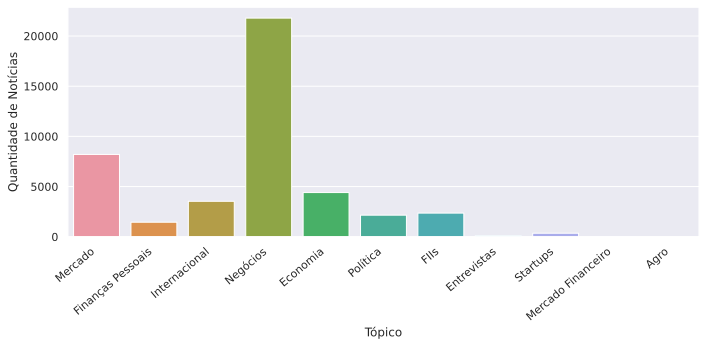

In [11]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(x=df_suno['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.ylabel('Quantidade de Notícias')
plt.xlabel('Tópico')

plt.tight_layout()
plt.show()

In [12]:
df_suno['topic'].value_counts()

topic
Negócios              21784
Mercado                8200
Economia               4407
Internacional          3535
FIIs                   2358
Política               2152
Finanças Pessoais      1451
Startups                354
Entrevistas             107
Agro                      8
Mercado Financeiro        4
Name: count, dtype: int64

In [15]:
print ('Suno Research')

news_counts_dict = {}

# Number of news per year
for year in range (2017, 2024):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_suno.loc[start_date:end_date].shape[0]))
    
    news_counts_dict[year] = df_suno.loc[start_date:end_date].shape[0]

Suno Research
Notícias em 2017: 0
Notícias em 2018: 1453
Notícias em 2019: 7708
Notícias em 2020: 10240
Notícias em 2021: 12069
Notícias em 2022: 8298
Notícias em 2023: 4592


In [17]:
news_counts_dict

{2017: 0,
 2018: 1453,
 2019: 7708,
 2020: 10240,
 2021: 12069,
 2022: 8298,
 2023: 4592}

In [22]:
df_news_counts = pd.DataFrame(news_counts_dict.items(), columns=['year', 'news_count']).set_index('year')
df_news_counts

,news_count
year,
2017,0
2018,1453
2019,7708
2020,10240
2021,12069
2022,8298
2023,4592


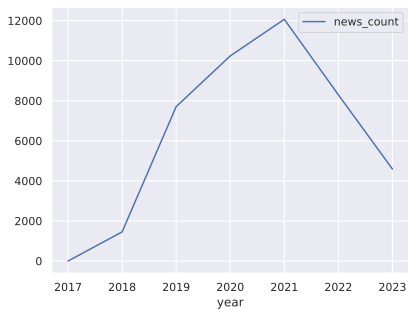

In [24]:
sns.lineplot(data=df_news_counts);

In [25]:
print('Quantidade Total de Notícias: ', df_news_counts['news_count'].sum())

Quantidade Total de Notícias:  44360


### 2) MoneyTimes

In [29]:
with open('../crawlers/money-times/data/moneytimes-latest-results-20230726.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_moneytimes = pd.DataFrame(data)

In [30]:
# Convert date to datetime format
df_moneytimes['date'] = pd.to_datetime(df_moneytimes['date'], format='%d/%m/%Y - %H:%M')

# Set date column as index
df_moneytimes.set_index('date', inplace=True)

# Order by date
df_moneytimes.sort_index(inplace=True)

In [32]:
df_moneytimes.sample(5)

,topic,title,full_text,link,tags
date,,,,,
2020-09-21 19:35:00,Saúde,Brasil registra 377 novas mortes por Covid-19 ...,O Brasil registrou nesta segunda-feira 377 nov...,https://www.moneytimes.com.br/brasil-registra-...,"[Brasil, Coronavírus, Ministério da Saúde, Reu..."
2021-08-31 14:41:00,Comprar ou vender?,Como Via vai fechar lacuna em relação aos riva...,"Em processo de turnaround, a Via (VIIA3) está ...",https://www.moneytimes.com.br/como-via-vai-fec...,"[Ações, Ativa Investimentos, Business Times, C..."
2021-04-10 09:38:00,Economia,Gasolina e diesel voltam a ter leve recuo nos ...,Os preços médios da gasolina e do óleo diesel ...,https://www.moneytimes.com.br/gasolina-e-diese...,"[ANP, Combustíveis, Diesel, Economia, Gasolina..."
2022-02-22 17:59:00,Política,EUA miram bancos russos com novas sanções ocid...,"O presidente dos Estados Unidos, Joe Biden, an...",https://www.moneytimes.com.br/eua-miram-bancos...,"[Estados Unidos (EUA), Europa, Joe Biden, Otan..."
2021-04-12 10:00:00,Economia,Receita adia prazo de entrega da declaração de...,A Receita Federal adiou o prazo final para ent...,https://www.moneytimes.com.br/receita-adia-pra...,"[Coronavírus, Economia, Imposto de Renda, Rece..."


In [33]:
df_moneytimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183578 entries, 2018-09-03 10:58:00 to 2023-07-26 16:47:00
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   topic      183578 non-null  object
 1   title      183578 non-null  object
 2   full_text  183578 non-null  object
 3   link       183578 non-null  object
 4   tags       183578 non-null  object
dtypes: object(5)
memory usage: 8.4+ MB


<Axes: ylabel='topic'>

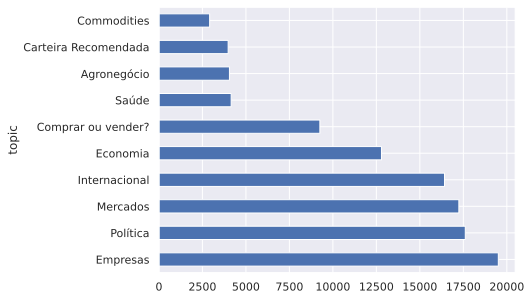

In [34]:
df_moneytimes['topic'].value_counts()[:10].plot(kind='barh')

In [43]:
print ('Money Times')

news_counts_dict = {}

# Number of news per year
for year in range (2017, 2024):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_moneytimes.loc[start_date:end_date].shape[0]))
    
    news_counts_dict[year] = df_moneytimes.loc[start_date:end_date].shape[0]

Money Times
Notícias em 2017: 0
Notícias em 2018: 7008
Notícias em 2019: 31186
Notícias em 2020: 41490
Notícias em 2021: 42579
Notícias em 2022: 44026
Notícias em 2023: 17289


In [44]:
df_news_counts = pd.DataFrame(news_counts_dict.items(), columns=['year', 'news_count']).set_index('year')
df_news_counts

,news_count
year,
2017,0
2018,7008
2019,31186
2020,41490
2021,42579
2022,44026
2023,17289


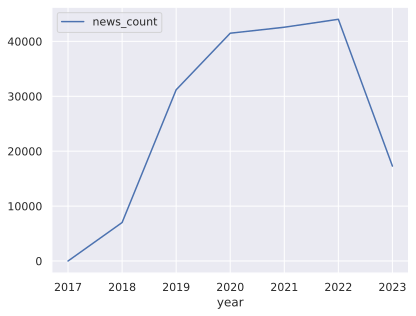

In [45]:
sns.lineplot(data=df_news_counts);

In [46]:
print('Quantidade Total de Notícias: ', df_news_counts['news_count'].sum())

Quantidade Total de Notícias:  183578


### 3) InfoMoney

In [8]:
with open('../crawlers/infomoney/data/infomoney-latest-results-20230730.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_infomoney = pd.DataFrame(data)

In [9]:
def convert_month(full_date):
    
    m_list = ['jan', 'fev', 'mar', 'abr', 'maio', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
    
    for m in m_list:
        if m in full_date:
            full_date = full_date.replace(m, str(m_list.index(m) + 1))
            
    return full_date

In [10]:
df_infomoney['date'] = df_infomoney['date'].apply(convert_month)

# Convert date to datetime format
df_infomoney['date'] = pd.to_datetime(df_infomoney['date'], format='%d %m %Y %Hh%M', infer_datetime_format=True)

# Set date column as index
df_infomoney.set_index('date', inplace=True)

# Order by date
df_infomoney.sort_index(inplace=True)

/tmp/ipykernel_3130/1326462965.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_infomoney['date'] = pd.to_datetime(df_infomoney['date'], format='%d %m %Y %Hh%M', infer_datetime_format=True)


In [11]:
df_infomoney.sample(5)

,topic,title,full_text,link,tags
date,,,,,
2018-05-02 08:24:00,onde-investir,Cenário inédito na economia brasileira gera op...,"Autor:Felipe Bevilacqua, Gestor Especialista d...",https://www.infomoney.com.br/onde-investir/cen...,"[Onde Investir, Renda Fixa, XP Investimentos]"
2017-07-25 11:05:00,onde-investir,InfoMoney lança assessoria virtual para ajudar...,SÃO PAULO – Se você um dia abordar um especial...,https://www.infomoney.com.br/onde-investir/inf...,"[Onde Investir, Investimentos, XP Investimentos]"
2022-02-21 13:53:00,mercados,Donetsk e Lugansk: Putin está analisando recon...,"(ANSA) – O presidente da Rússia, Vladimir Puti...",https://www.infomoney.com.br/mercados/donetsk-...,"[Economia, Mercados, Rússia, Ucrânia, Vladimir..."
2019-08-05 06:40:00,carreira,4 tendências que todo profissional deve saber ...,SÃO PAULO – O mercado de trabalho está se tran...,https://www.infomoney.com.br/carreira/4-tenden...,"[Carreira, Emprego, Mercado de Trabalho, Robôs..."
2017-07-15 17:15:00,politica,Defesa de Lula entra com embargos de declaraçã...,A defesa do ex-presidente Luiz Inácio Lula da ...,https://www.infomoney.com.br/politica/defesa-d...,"[Política, Lula, Operação Lava-Jato, Sérgio Moro]"


In [12]:
df_infomoney.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89677 entries, 2016-10-06 06:15:00 to 2023-07-29 17:36:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   topic      89677 non-null  object
 1   title      89677 non-null  object
 2   full_text  89677 non-null  object
 3   link       89677 non-null  object
 4   tags       89677 non-null  object
dtypes: object(5)
memory usage: 4.1+ MB


In [14]:
print ('InfoMoney')

# Number of news per year
for year in range (2015, 2024):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_infomoney.loc[start_date:end_date].shape[0]))

InfoMoney
Notícias em 2015: 0
Notícias em 2016: 3261
Notícias em 2017: 14927
Notícias em 2018: 11959
Notícias em 2019: 9040
Notícias em 2020: 10212
Notícias em 2021: 12438
Notícias em 2022: 15761
Notícias em 2023: 12079


In [ ]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_infomoney['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.ylabel('Quantidade de Notícias')
plt.xlabel('Tópico')

plt.tight_layout()
plt.show()

### 4) Fundamentus

In [25]:
with open('../crawlers/fundamentus/data/results-fundamentus.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_fundamentus = pd.DataFrame(data)

In [26]:
# Convert date to datetime format
df_fundamentus['date'] = pd.to_datetime(df_fundamentus['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df_fundamentus.set_index('date', inplace=True)

# Order by date
df_fundamentus.sort_index(inplace=True)

In [27]:
df_fundamentus.head(100)

,company,title,type,url,ticker
date,,,,,
2020-11-13 18:26:00,ENERGISA,Requerimento de registro de OPA - Rede Energia...,FR,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,ENGI11
2020-11-13 18:29:00,PÃO DE AÇÚCAR,Digital Day GPA - participação do Diretor Pres...,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,PCAR3
2020-11-13 18:30:00,OSX BRASIL,Apresentação Pública de Resultados - 3º ITR 2020,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,OSXB3
2020-11-13 18:48:00,Tenda,Agenda de Eventos 16.11.2020 - 22.11.2020,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,TEND3
2020-11-13 18:55:00,CEA MODAS,Inauguração de Loja,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,CEAB3
...,...,...,...,...,...
2020-11-18 18:19:00,EMAE,Assinatura de contrato com o vencedor da licit...,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,EMAE4
2020-11-18 18:20:00,ETERNIT,Alienação da UPI Louças Sanitárias,FR,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,ETER3
2020-11-18 18:31:00,TECNISA,Comunicado ao Mercado - Evento Online com Exec...,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,TCSA3


In [28]:
df_fundamentus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049 entries, 2020-11-13 18:26:00 to 2021-01-06 09:06:00
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1049 non-null   object
 1   title    1049 non-null   object
 2   type     1049 non-null   object
 3   url      1049 non-null   object
 4   ticker   1049 non-null   object
dtypes: object(5)
memory usage: 49.2+ KB


---

### 5) B3

In [29]:
with open('../crawlers/b3/data/results-b3.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_fb3 = pd.DataFrame(data)

In [30]:
df_fb3.head(10)

,razao_social,nome_pregao,segmento,tickers,setor_economico,subsetor,segmento_setorial,url_dados
0,3R PETROLEUM ÓLEO E GÁS S.A,3R PETROLEUM,NM,[RRRP3],Petróleo. Gás e Biocombustíveis,Petróleo. Gás e Biocombustíveis,Exploração. Refino e Distribuição,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...
1,BCO PINE S.A.,PINE,N2,"[PINE3, PINE4]",Financeiro,Intermediários Financeiros,Bancos,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...
2,BICICLETAS MONARK S.A.,BIC MONARK,NDA,[BMKS3],Consumo Cíclico,Viagens e Lazer,Bicicletas,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...
3,BEMOBI MOBILE TECH S.A.,BEMOBI TECH,NM,[BMOB3],Tecnologia da Informação,Programas e Serviços,Programas e Serviços,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...
4,BETAPART PARTICIPACOES S.A.,BETAPART,MB,[BETP3B],Outros,Outros,Outros,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...
5,BCO NORDESTE DO BRASIL S.A.,NORD BRASIL,NDA,[BNBR3],Financeiro,Intermediários Financeiros,Bancos,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...
6,BCO PAN S.A.,BANCO PAN,N1,[BPAN4],Financeiro,Intermediários Financeiros,Bancos,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...
7,BCO SANTANDER (BRASIL) S.A.,SANTANDER BR,NDA,"[SANB11, SANB3, SANB4]",Financeiro,Intermediários Financeiros,Bancos,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...
8,BCO MERCANTIL DO BRASIL S.A.,MERC BRASIL,N1,"[BMEB3, BMEB4]",Financeiro,Intermediários Financeiros,Bancos,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...
9,BCO MERCANTIL DE INVESTIMENTOS S.A.,MERC INVEST,NDA,"[BMIN3, BMIN4]",Financeiro,Intermediários Financeiros,Bancos,http://bvmf.bmfbovespa.com.br/pt-br/mercados/a...


In [31]:
df_fb3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   razao_social       448 non-null    object
 1   nome_pregao        448 non-null    object
 2   segmento           448 non-null    object
 3   tickers            448 non-null    object
 4   setor_economico    448 non-null    object
 5   subsetor           448 non-null    object
 6   segmento_setorial  448 non-null    object
 7   url_dados          448 non-null    object
dtypes: object(8)
memory usage: 28.1+ KB


In [35]:
df_fb3['setor_economico'].value_counts()[:10]

Consumo Cíclico                    91
Financeiro                         80
Bens Industriais                   74
Utilidade Pública                  69
Materiais Básicos                  31
Consumo não Cíclico                29
Saúde                              20
Outros                             17
Tecnologia da Informação           15
Petróleo. Gás e Biocombustíveis    12
Name: setor_economico, dtype: int64

In [34]:
df_fb3['segmento_setorial'].value_counts()[:10]

Energia Elétrica                 59
Incorporações                    26
Bancos                           23
Outros                           17
Securitizadoras de Recebíveis    16
Exploração de Imóveis            15
Exploração de Rodovias           14
Programas e Serviços             13
Fios e Tecidos                   11
Serviços Diversos                10
Name: segmento_setorial, dtype: int64

In [36]:
df_fb3['segmento'].value_counts()[:10]

NM     180
NDA    170
N1      27
MB      27
N2      23
MA      15
DR3      4
M2       2
Name: segmento, dtype: int64

---